In [1]:
# all import statements
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import tifffile
import pandas as pd
import seaborn as sns
import time
import os
import glob
from skimage import measure
import skimage.measure as skmeas

Image.MAX_IMAGE_PIXELS = None

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [86]:
# Edit this code block and run the next code block
##############################################

# Enter all of the image and nuc mask path 
Image_path = sorted(glob.glob('/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220415_PI3K/*.tif'))

# if your nuc mask is 1 labelled and cells need to be individually labeled: 
Mask_path_Nuc_OLD = sorted(glob.glob('/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220415_PI3K/Round2/*.tif'))

# if your nuc mask is already individually labeled: 
#Mask_path_Nuc = sorted(glob.glob("/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/*_NEW.tif"))


In [33]:
Mask_path_cyto = sorted(glob.glob("/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/*_cyto_mask.tif"))


In [81]:
Image_path

['/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Grower_B4.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Grower_B4_0001.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Grower_B6.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Grower_F5.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Grower_F5_0001.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Nongrower_A4.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Nongrower_D8.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Nongrower_E6.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Nongrower_H10.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Nongrower_H10_0001.tif']

In [82]:
Mask_path_Nuc_OLD

['/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/mask_mask_Grower_B4.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/mask_mask_Grower_B4_0001.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/mask_mask_Grower_B6.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/mask_mask_Grower_F5.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/mask_mask_Grower_F5_0001.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/mask_mask_Nongrower_A4.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/mask_mask_Nongrower_D8.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/mask_mask_Nongrower_E6.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/mask_mask_Nongrower_H10.tif',
 '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/mask_mask_Nongrower_H10_0001.tif']

loading well 0
Made new Nuc Mask! 0
(1070, 1038)
(1070, 1038)
Made cyto mask! 0
1070
[ 1.  1.  1. ... 54. 54. 54.]
yup
Made Ratios csv! 0
loading well 1
Made new Nuc Mask! 1
(1016, 1081)
(1016, 1081)
Made cyto mask! 1
1016
[ 1.  1.  1. ... 84. 84. 84.]
yup
Made Ratios csv! 1
loading well 2
Made new Nuc Mask! 2
(1327, 1434)
(1327, 1434)
Made cyto mask! 2
1327
[ 1.  1.  1. ... 67. 67. 67.]
yup
Made Ratios csv! 2
loading well 3
Made new Nuc Mask! 3
(1359, 1284)
(1359, 1284)
Made cyto mask! 3
1359
[ 1.  1.  1. ... 85. 85. 85.]
yup
Made Ratios csv! 3
loading well 4
Made new Nuc Mask! 4
(1605, 1581)
(1605, 1581)
Made cyto mask! 4
1605
[  1.   1.   1. ... 189. 189. 189.]
yup
Made Ratios csv! 4
loading well 5
Made new Nuc Mask! 5
(943, 1155)
(943, 1155)
Made cyto mask! 5
943
[ 1.  1.  1. ... 98. 98. 98.]
yup
Made Ratios csv! 5
loading well 6
Made new Nuc Mask! 6
(1212, 1278)
(1212, 1278)
Made cyto mask! 6
1212
[ 1.  1.  1. ... 96. 96. 96.]
yup
Made Ratios csv! 6
loading well 7
Made new Nuc Mas

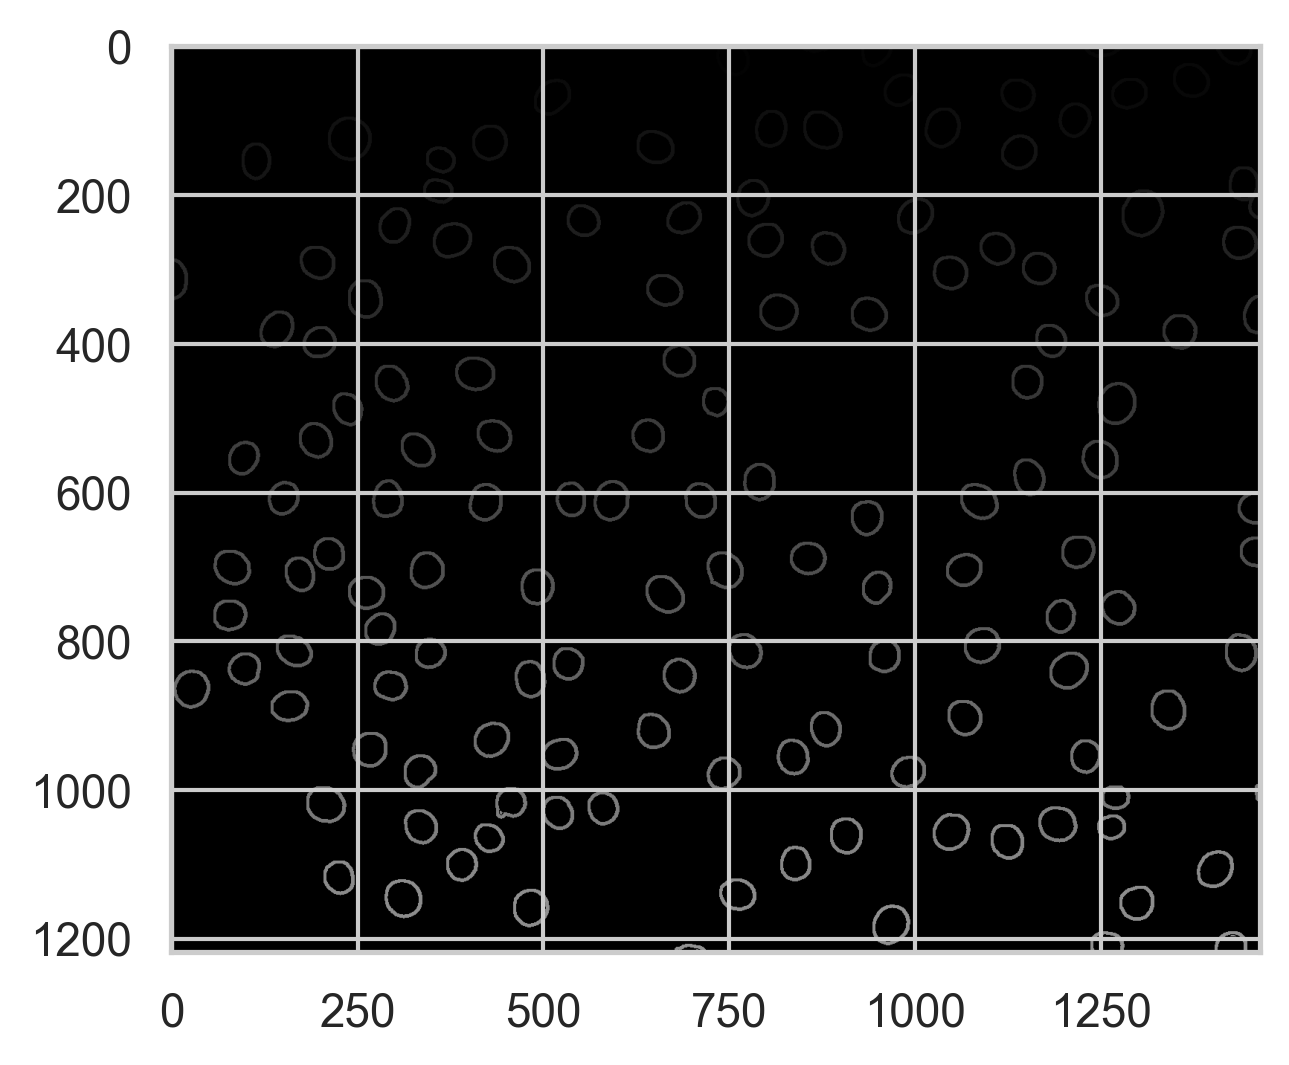

In [89]:
# Making all of the new nuc/cyto masks and creating ratios in CSVs

Mask_path_cyto = []
Mask_path_Nuc =[]           # if you filled Mask_path_Nuc_OLD, otherwise comment out

for i in range(len(Image_path)): 
    print('loading well', i)
    
#     #make the new object nuc masks *** only if needed (comment out otherwise)
    Mask_path_Nuc.append(makeNewNucMask(Mask_path_Nuc_OLD[i]))
    print('Made new Nuc Mask!', i)

#     #make the cyto mask 
    Mask_path_cyto.append(makeCytoMask(Mask_path_Nuc[i])) 
    print('Made cyto mask!', i)
    
    #make the Ratio CSVs
    CytoNucRatios(Image_path[i],Mask_path_Nuc[i],Mask_path_cyto[i],1) # 0 is hard coded
    print('Made Ratios csv!', i)
    
#     print(Image_path[i] )
#     print(Mask_path_Nuc[i] )
#     print(Mask_path_cyto[i] )

In [5]:


# function to create nuc mask labeling cells individually, input mask with one value
def makeNewNucMask(nucPath):

    # Load original Nuc Mask that is all one label
    AllMaskNuc=tifffile.imread(nucPath)
    AllMaskNuc = AllMaskNuc.astype("float32")

    # Create New Nuc Mask -- individual cells are labelled
    example = skmeas.label(AllMaskNuc, connectivity=1)
    example = example.astype("float32")
    
    # Save new Nuc Mask
    nucNewPath = str(nucPath+'_NEW.tif')
    cv2.imwrite(nucNewPath, example)
    
    return nucNewPath

In [6]:
# function to create cyto mask (donut)
def makeCytoMask(nucPath):
    # read in nuc mask 
    nucMaskArray = tifffile.imread(nucPath)
    print(nucMaskArray.shape)
    nucMaskArray = nucMaskArray.astype("float32")
    
    # create kernel -- increase kernel size, increases the dilation magnitude 
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))

    # create an dilation plot from the nuclear mask 
    dn = cv2.dilate(nucMaskArray, kernel)
    print(dn.shape)
    
    # save dilation plot 
    dilatePath = nucPath.split('_nuc_mask.tif')[0]
    dilatePath = str(dilatePath+'_dilated.tif')
    cv2.imwrite(dilatePath, dn)

    # Load the dilation and Nuc masks and their pixel maps
    input_imageD = Image.open(dilatePath)
    input_imageN = Image.open(nucPath)
    pixel_mapDil = input_imageD.load()
    pixel_mapNuc = input_imageN.load()

    # create new image mask using dilation mask perimeters
    img = Image.new(input_imageD.mode, input_imageD.size)
    pixelsNew = img.load()

    # get the pixel width and heigh of the of the dilation image:
    width, height = input_imageD.size
    
    # for all non 0 pixels of Nuc Mask, make black in dilated image and load to new mask 
    for i in range(width):
        for j in range(height): 
            if(pixel_mapNuc[i,j] != 0):
                pixelsNew[i,j] = (0)
            else:
                pixelsNew[i,j] = (pixel_mapDil[i,j])

    # Save and show new cyto mask 
    cytoPath = nucPath.split('_nuc_mask.tif')[0]
    cytoPath = str(cytoPath+'_cyto_mask.tif')
    img.save(cytoPath) 
    plt.imshow(img)
    return cytoPath

In [88]:
# function that outputs the sum and mean ratios of Cyto to Nuc fluorescence
def CytoNucRatios(Image_path, Mask_path_Nuc, Mask_path_cyto,CHANNELS):
    # read in Nuc Mask 
    AllMaskNuc=tifffile.imread(Mask_path_Nuc)
    print(len(AllMaskNuc))

    if len(AllMaskNuc.shape) == 2:
        AllMaskNuc = AllMaskNuc
    elif len(AllMaskNuc.shape) == 3:
        AllMaskNuc = AllMaskNuc[0,...]
    elif len(AllMaskNuc.shape) == 4:
        AllMaskNuc = AllMaskNuc[0,...,0]
    else:
        print("mask has unsupported dimensions")
    AllMaskNuc = np.array(AllMaskNuc)

    # read in Cyto Mask 
    AllMaskCyto=tifffile.imread(Mask_path_cyto)
    
    #read in raw image mask 
    RawIm = tifffile.imread(Image_path)

    # UMASKNuc = np.unique(AllMaskNuc)[1:] ==> don't need because cyto will be smaller 
    UMASKCyto = np.unique(AllMaskCyto)[1:]

    #get sum and mean intensity within each mask for all channels specified
    All_sumRatio = []
    All_meanRatio = []
    All_medianRatio = []


    cIm = RawIm[1,...]#[CHANNELS,...]
    # cIm = RawIm
    MaskID = []

    allpixTotalNuc = cIm[AllMaskNuc != 0]
    allMaskTotalNuc = AllMaskNuc[AllMaskNuc != 0]

    allpixTotalCyto = cIm[AllMaskCyto != 0]
    allMaskTotalCyto = AllMaskCyto[AllMaskCyto != 0]
    print(allMaskTotalCyto)

    tmp_sumRatio = []
    tmp_meanRatio = []
    tmp_medianRatio = []

    print('yup')

    mask = 2
    # for mask in UMASK:
    for mask in UMASKCyto:
        allpixNuc = allpixTotalNuc[allMaskTotalNuc == mask]
        allpixCyto = allpixTotalCyto[allMaskTotalCyto == mask]
        sumRatio = np.sum(allpixCyto)/np.sum(allpixNuc)
        meanRatio = np.mean(allpixCyto)/np.mean(allpixNuc)
        medianRatio = np.median(allpixCyto)/np.median(allpixNuc)
        tmp_sumRatio.append(sumRatio)
        tmp_meanRatio.append(meanRatio)
        tmp_medianRatio.append(medianRatio)
        MaskID.append(mask)
        mask += 1
        #print(mask)
        #print(time.time())

    All_sumRatio.append(tmp_sumRatio)
    All_meanRatio.append(tmp_meanRatio)
    All_medianRatio.append(tmp_medianRatio)

    #put data into data frames
    sum_dfnames = []
    mean_dfnames = []
    median_dfnames = []
    for channel in range(0,CHANNELS):
        All_sumRatio[channel] = np.array(All_sumRatio[channel])
        All_meanRatio[channel] = np.array(All_meanRatio[channel])
        All_medianRatio[channel] = np.array(All_medianRatio[channel])

        sum_dfnames.append(str("sum_Channel"+str(channel+1)))
        mean_dfnames.append(str("mean_Channel"+str(channel+1)))
        median_dfnames.append(str("median_Channel"+str(channel+1)))

    All_sumRatio = pd.DataFrame(data=All_sumRatio, index= sum_dfnames).T

    All_meanRatio = pd.DataFrame(data=All_meanRatio, index= mean_dfnames).T

    All_medianRatio = pd.DataFrame(data = All_medianRatio, index = median_dfnames).T

    Alldat = pd.concat([All_meanRatio, All_sumRatio, All_medianRatio], axis=1)

    Alldat.insert(0, "MaskID", MaskID)

    #save data
    outpath = Mask_path_Nuc.split('_mask.tif')[0]
    outpath = str(outpath+'_CytoToNucratios.csv')
    Alldat.to_csv(outpath,index=False)
    return Alldat

In [90]:
'''#Raw image in Tif format
ImagePath = '/Volumes/gharmHD1/20211103_FOXO_mClover/Stitch_tif/test/DownSized/20211103_125959_945__Plate000_Well07_ChannelA594,GFP_Seq0003.tif'
#Mask in Tif format
MaskPath = '/Volumes/gharmHD1/20211103_FOXO_mClover/Stitch_tif/test/DownSized/cyto_mask.tif'
#Channel of raw image mask is trying to capture (default is 1)
Channel = 2
#number to set brightness of raw image in output image (default = .15)
brightness = .15'''

os.chdir('/Users/raul/Desktop/Archive/CellQuant')            # edit directory to your CellQuant path
import CellQuant

#Run MaskCheck on all cyto and nuc masks
for i in range(len(Image_path)): 
    CellQuant.MaskCheck(Image_path[i],Mask_path_Nuc[i],channel=1)
    CellQuant.MaskCheck(Image_path[i],Mask_path_cyto[i],channel=1)

In [19]:
path_crop.split('mask_mask_')[-1][0:3]


'Gro'

In [ ]:
# plot 

In [3]:
from statannot import add_stat_annotation

1 2
2 2
Gro v.s. Non: t-test independent samples with Bonferroni correction, P_val=3.763e-216 stat=3.280e+01


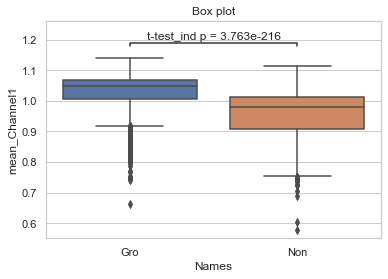

In [2]:
#Import pakages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob

#Path to files from Step1
paths_to_data = '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/*.csv'

paths_to_data  = glob.glob(paths_to_data)

#Name of samples (extract from file name)
names = ["Gro", "Non"]


#Extract the data

colony_all_files = []
colony_hold = []
colony_name = []
cnt = 0
for i,name in enumerate(names):

    print(i+1,len(names))

    

    for path_crop in paths_to_data:

        file_name = path_crop.split('mask_mask_')[-1][0:3]
        #print(file_name,name)

        if name == file_name:
            #print(path_crop)

            df_points = pd.read_csv(path_crop)
            #print(df_points)
            
            x = name + '.'
            x = x*len(df_points)
            df_points['ID'] = x.split('.')[0:-1]
            

        if cnt == 0:
            df1 = df_points
            cnt = 1
        else:
            frames = [df1 ,df_points]
            df1 = pd.concat(frames, ignore_index=True, sort=False)





# Plots
sns.set(style="whitegrid")
x = "ID"
y = "mean_Channel1"
ax = sns.boxplot(x=x, y=y, data=df1,order=names)
add_stat_annotation(ax, data=df1, x=x, y=y,order=names,
                    box_pairs=[("Gro","Non")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)
locs=ax.get_xticks()
plt.title('Box plot');
plt.xlabel('Names')
#plt.ylabel('Number of cells per colony')
plt.savefig("/Volumes/GoogleDrive/My Drive/Hueros_Shared/Paper/Data/PI3K_rhDKK1/Fox01_PI3K_colonies.pdf", bbox_inches='tight')
plt.show()




# sns.histplot(data=df,x = 'values', hue="names", log_scale=True)
# plt.show()

1 2
2 2


NameError: name 'add_stat_annotation' is not defined

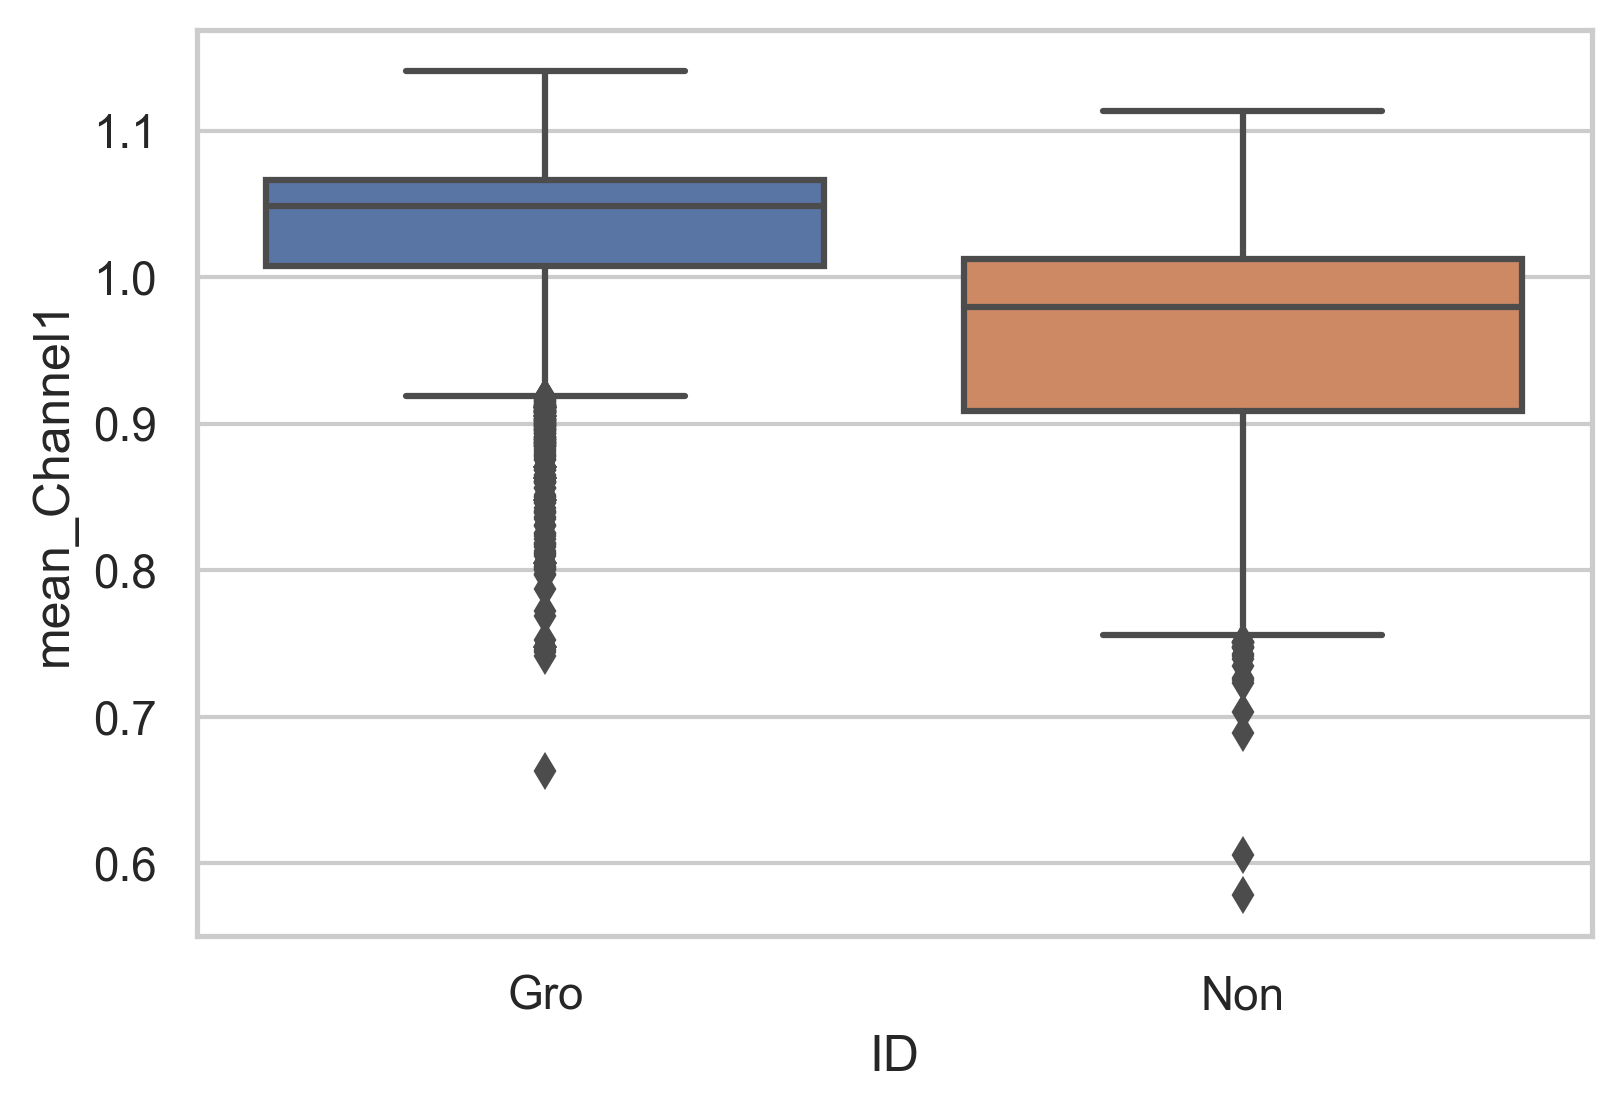

In [2]:
#Import pakages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob

#Path to files from Step1
paths_to_data = '/Volumes/GoogleDrive/My Drive/Hueros_Shared/Paper/Data/PI3K/20220419_PI3K_colony/Round2/*.csv'

paths_to_data  = glob.glob(paths_to_data)

#Name of samples (extract from file name)
names = ["Gro", "Non"]


#Extract the data

colony_all_files = []
colony_hold = []
colony_name = []
cnt = 0
for i,name in enumerate(names):

    print(i+1,len(names))

    

    for path_crop in paths_to_data:

        file_name = path_crop.split('mask_mask_')[-1][0:3]
        #print(file_name,name)

        if name == file_name:
            #print(path_crop)

            df_points = pd.read_csv(path_crop)
            #print(df_points)
            
            #df_points = df_points[["MaskID","mean_Channel1","sum_Channel1","median_Channel1"]].mean()
            
            x = name + '.'
            x = x*len(df_points)
            df_points['ID'] = x.split('.')[0:-1][0]
            
            df_points['ColID'] = cnt
            

        if cnt == 0:
            df1 = df_points
            cnt = 1
        else:
            frames = [df1 ,df_points]
            df1 = pd.concat(frames, ignore_index=True, sort=False)
            cnt += 1





# Plots
sns.set(style="whitegrid")
x = "ID"
y = "mean_Channel1"
ax = sns.boxplot(x=x, y=y, data=df1,order=names)
add_stat_annotation(ax, data=df1, x=x, y=y,order=names,
                    box_pairs=[("Gro","Non")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)
locs=ax.get_xticks()
plt.title('Box plot');
plt.xlabel('Names')
#plt.ylabel('Number of cells per colony')
#plt.savefig("/Volumes/GoogleDrive/My Drive/Hueros_Shared/Paper/Data/PI3K_rhDKK1/Fox01_PI3K_colonies.pdf", bbox_inches='tight')
plt.show()




# sns.histplot(data=df,x = 'values', hue="names", log_scale=True)
# plt.show()

G v.s. N: t-test independent samples with Bonferroni correction, P_val=2.374e-03 stat=4.372e+00


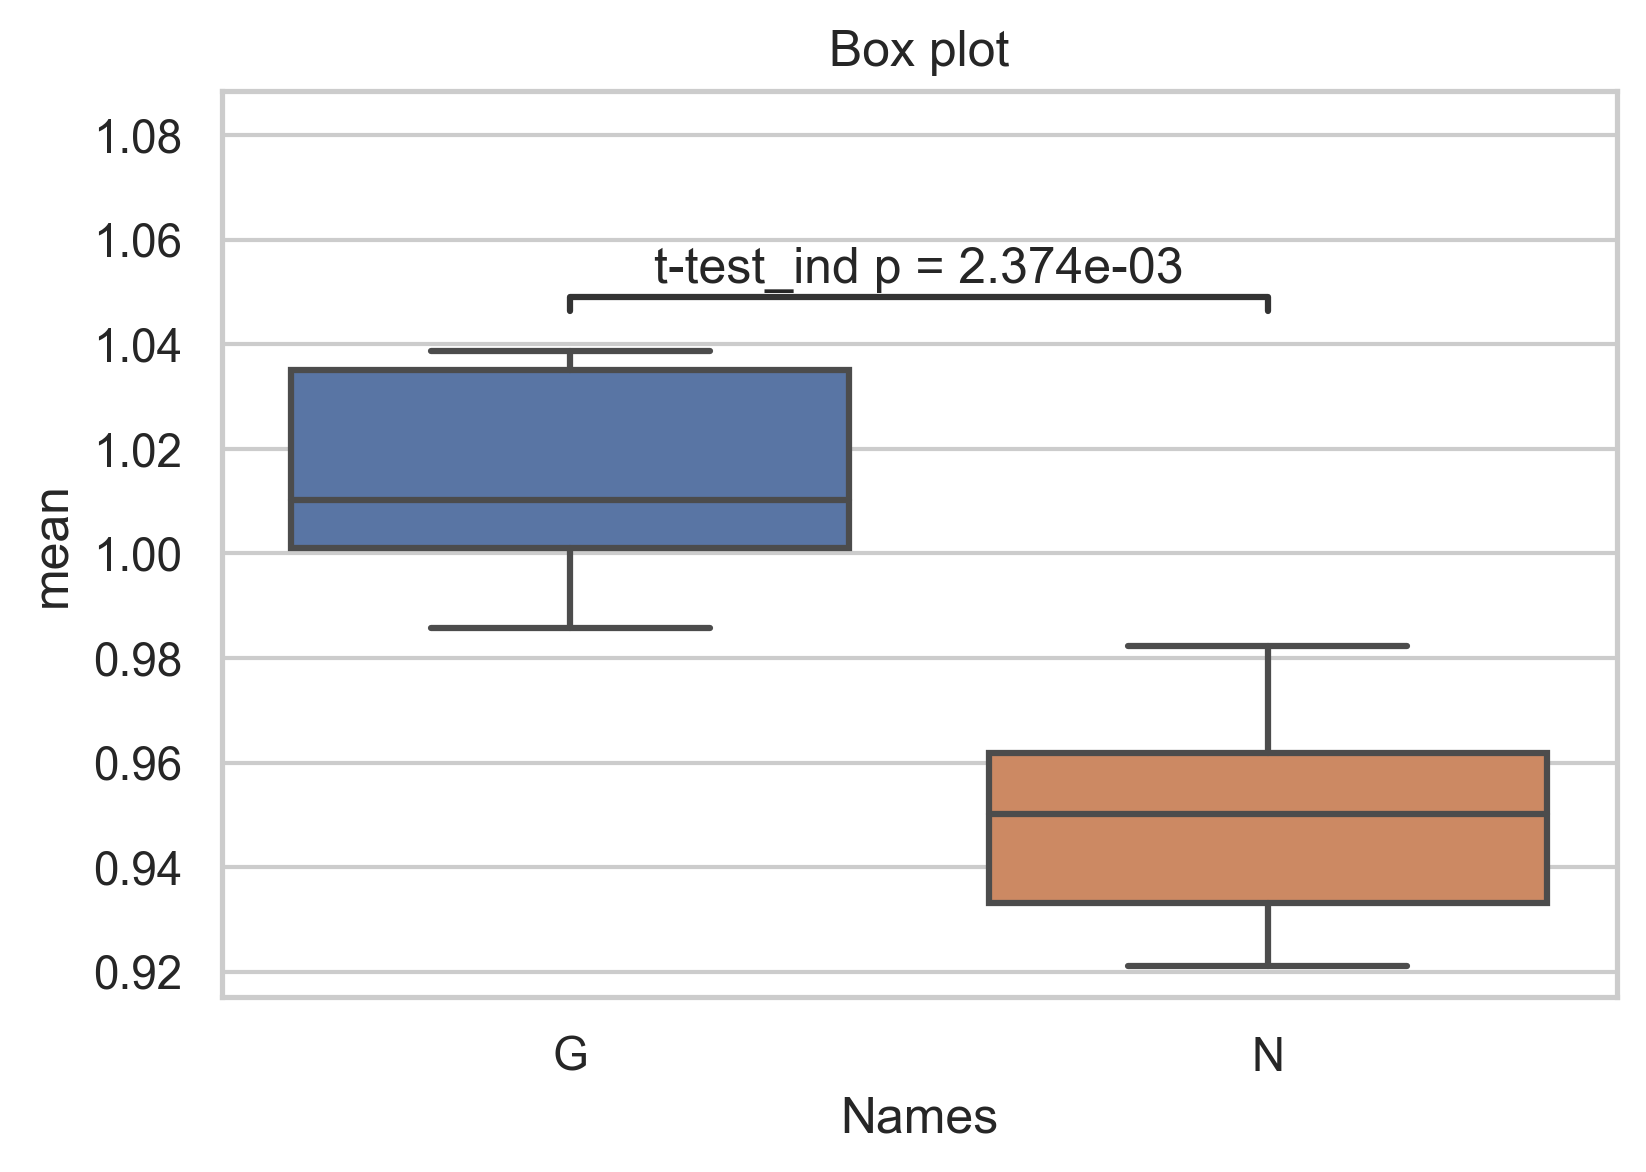

In [5]:
x = "ColID"
y = "mean_Channel1"

df = df1.groupby(x)[y].agg(['min','max','mean'])

#df = df.groupby(np.arange(len(df))//5).mean()

df['ID'] = ['G','G','G','G','G','N','N','N','N','N']#np.unique(df1[["ColID"]])



# Plots
sns.set(style="whitegrid")
x = "ID"
y = "mean"
ax = sns.boxplot(x=x, y=y, data=df)
add_stat_annotation(ax, data=df, x=x, y=y,
                    box_pairs=[("G","N")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)

locs=ax.get_xticks()
plt.title('Box plot');
plt.xlabel('Names')
#plt.ylabel('Number of cells per colony')
plt.savefig("/Volumes/GoogleDrive/My Drive/Hueros_Shared/Paper/Data/PI3K/20220419_PI3K_colony/Fox01_PI3K_colonies.pdf", bbox_inches='tight')
plt.show()




1 3
2 3
3 3
20x v.s. 20x_1FBS: t-test independent samples with Bonferroni correction, P_val=1.844e-29 stat=1.168e+01
20x_1FBS v.s. 20x_10FBS: t-test independent samples with Bonferroni correction, P_val=2.632e-01 stat=-1.710e+00
20x v.s. 20x_10FBS: t-test independent samples with Bonferroni correction, P_val=1.680e-14 stat=7.928e+00


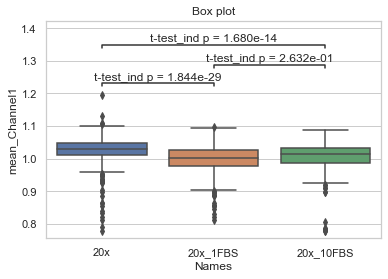

20x v.s. 20x_1FBS: t-test independent samples with Bonferroni correction, P_val=4.825e-27 stat=1.114e+01
20x_1FBS v.s. 20x_10FBS: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-8.257e-01
20x v.s. 20x_10FBS: t-test independent samples with Bonferroni correction, P_val=1.758e-15 stat=8.221e+00


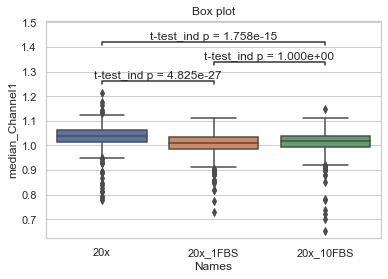

20x v.s. 20x_1FBS: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-8.127e-01
20x_1FBS v.s. 20x_10FBS: t-test independent samples with Bonferroni correction, P_val=5.878e-01 stat=-1.294e+00
20x v.s. 20x_10FBS: t-test independent samples with Bonferroni correction, P_val=7.219e-02 stat=-2.259e+00


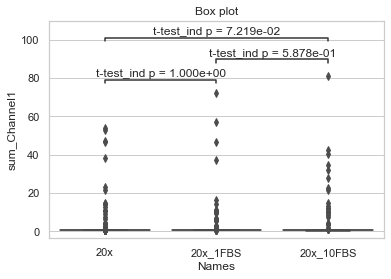

In [89]:
#Import pakages
df1 = []
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob

#Path to files from Step1
paths_to_data = '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220415_PI3K/Round2/*.csv'

paths_to_data  = glob.glob(paths_to_data)

#Name of samples (extract from file name)
names = ["20x", "20x_1FBS","20x_10FBS"]


#Extract the data

colony_all_files = []
colony_hold = []
colony_name = []
cnt = 0
for i,name in enumerate(names):

    print(i+1,len(names))

    

    for path_crop in paths_to_data:

        file_name = path_crop.split('mask_mask_str_PI3K_')[-1].split('_crop')[0]
        #print(file_name,name)

        if name == file_name:
            #print(path_crop)

            df_points = pd.read_csv(path_crop)
            #print(df_points)
            
            x = name + '.'
            x = x*len(df_points)
            df_points['ID'] = x.split('.')[0:-1]
            
            df_points['ColID'] = cnt
            

            if cnt == 0:
                df1 = df_points
                cnt = 1
            else:
                frames = [df1 ,df_points]
                df1 = pd.concat(frames, ignore_index=True, sort=False)
                cnt += 1



# Plots
sns.set(style="whitegrid")
x = "ID"
y = "mean_Channel1"
ax = sns.boxplot(x=x, y=y, data=df1,order=names)
add_stat_annotation(ax, data=df1, x=x, y=y,order=names,
                    box_pairs=[("20x","20x_1FBS"),("20x", "20x_10FBS"),("20x_1FBS", "20x_10FBS")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)
locs=ax.get_xticks()
plt.title('Box plot');
plt.xlabel('Names')
#plt.ylabel('Number of cells per colony')
plt.show()
["20x", "20x_1FBS","20x_10FBS"]


# Plots
sns.set(style="whitegrid")
x = "ID"
y = "median_Channel1"
ax = sns.boxplot(x=x, y=y, data=df1,order=names)
add_stat_annotation(ax, data=df1, x=x, y=y,order=names,
                    box_pairs=[("20x","20x_1FBS"),("20x", "20x_10FBS"),("20x_1FBS", "20x_10FBS")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)
locs=ax.get_xticks()
plt.title('Box plot');
plt.xlabel('Names')
#plt.ylabel('Number of cells per colony')
plt.show()





# Plots
sns.set(style="whitegrid")
x = "ID"
y = "sum_Channel1"
ax = sns.boxplot(x=x, y=y, data=df1,order=names)
add_stat_annotation(ax, data=df1, x=x, y=y,order=names,
                    box_pairs=[("20x","20x_1FBS"),("20x", "20x_10FBS"),("20x_1FBS", "20x_10FBS")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)
locs=ax.get_xticks()
plt.title('Box plot');
plt.xlabel('Names')
#plt.ylabel('Number of cells per colony')
plt.show()


# sns.histplot(data=df,x = 'values', hue="names", log_scale=True)
# plt.show()


<ipython-input-91-38a0bfa606e5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'][i] = "10"


C v.s. 1: t-test independent samples with Bonferroni correction, P_val=9.128e-05 stat=1.043e+01
C v.s. 10: t-test independent samples with Bonferroni correction, P_val=1.020e-02 stat=4.298e+00


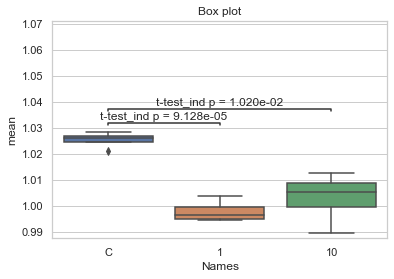

In [91]:
x = "ColID"
y = "mean_Channel1"

df = df1.groupby(x)[y].agg(['min','max','mean'])

#df = df.groupby(np.arange(len(df))//5).mean()

df['ID'] = np.unique(df1[["ColID"]])



for i in range(12):
    
    if i < 12:
        df['ID'][i] = "10"
    if i < 8:
        df['ID'][i] = "1"
    if i < 4:
        df['ID'][i] = "C"



# Plots
sns.set(style="whitegrid")
x = "ID"
y = "mean"
ax = sns.boxplot(x=x, y=y, data=df)
add_stat_annotation(ax, data=df, x=x, y=y,
                    box_pairs=[("C","1"),("C","10")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)

locs=ax.get_xticks()
plt.title('Box plot');
plt.xlabel('Names')
#plt.ylabel('Number of cells per colony')
plt.savefig("/Volumes/GoogleDrive/My Drive/Hueros_Shared/Paper/Data/PI3K_rhDKK1/Fox01_PI3K_colonies_fixed.pdf", bbox_inches='tight')
plt.show()




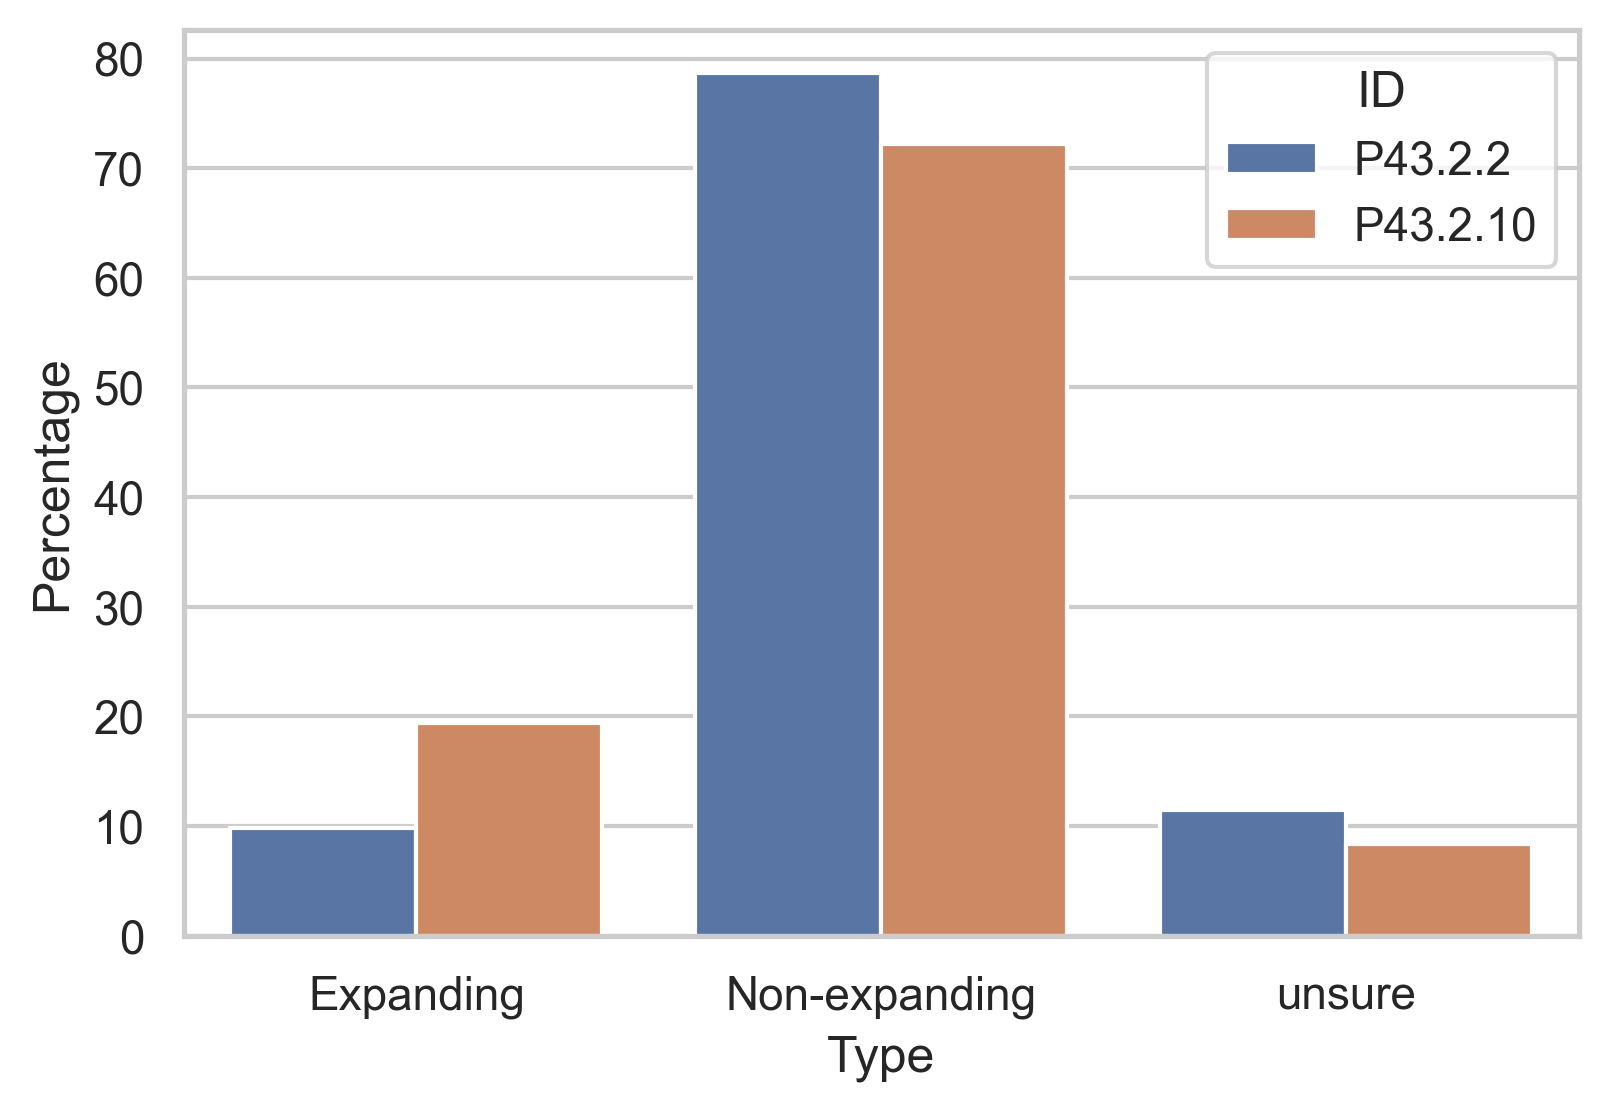

In [150]:
New = [6,48,7]
t_n = .01*(6+48+7)


old = [14,52,6]
t_o = .01*(14+52+6)

d = {'Percentage': [6/t_n,14/t_o,48/t_n,52/t_o,7/t_n,6/t_o], 'Type': ['Expanding','Expanding','Non-expanding','Non-expanding','unsure','unsure'], 'ID' : ['P43.2.2','P43.2.10','P43.2.2','P43.2.10','P43.2.2','P43.2.10']}

df = pd.DataFrame(data= d)

ax = sns.barplot(x="Type", y="Percentage", hue="ID", data=df)

In [12]:
#Import pakages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob

#Path to files from Step1
paths_to_data = '/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220419_PI3K_colony/Round2/*.csv'

paths_to_data  = glob.glob(paths_to_data)

#Name of samples (extract from file name)
names = ["Grower", "Nongro"]


#Extract the data

colony_all_files = []
colony_hold = []
colony_name = []
cnt = 0
for i,name in enumerate(names):

    print(i+1,len(names))

    

    for path_crop in paths_to_data:

        file_name = path_crop.split('mask_mask_')[-1][-6:-1]
        print(file_name,name)

        if name == file_name:
            #print(path_crop)

            df_points = pd.read_csv(path_crop)
            #print(df_points)
            
            x = name + '.'
            x = x*len(df_points)
            df_points['ID'] = x.split('.')[0:-1]
            

        if cnt == 0:
            df1 = df_points
            cnt = 1
        else:
            frames = [df1 ,df_points]
            df1 = pd.concat(frames, ignore_index=True, sort=False)





# Plots
sns.set(style="whitegrid")
x = "ID"
y = "mean_Channel1"
ax = sns.boxplot(x=x, y=y, data=df1,order=names)
add_stat_annotation(ax, data=df1, x=x, y=y,order=names,
                    box_pairs=[("20x","20x_1FBS"),("20x", "20x_10FBS"),("20x_1FBS", "20x_10FBS")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)
locs=ax.get_xticks()
plt.title('Box plot');
plt.xlabel('Names')
#plt.ylabel('Number of cells per colony')
plt.show()
["20x", "20x_1FBS","20x_10FBS"]


# Plots
sns.set(style="whitegrid")
x = "ID"
y = "median_Channel1"
ax = sns.boxplot(x=x, y=y, data=df1,order=names)
add_stat_annotation(ax, data=df1, x=x, y=y,order=names,
                    box_pairs=[("20x","20x_1FBS"),("20x", "20x_10FBS"),("20x_1FBS", "20x_10FBS")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)
locs=ax.get_xticks()
plt.title('Box plot');
plt.xlabel('Names')
#plt.ylabel('Number of cells per colony')
plt.show()





# Plots
sns.set(style="whitegrid")
x = "ID"
y = "sum_Channel1"
ax = sns.boxplot(x=x, y=y, data=df1,order=names)
add_stat_annotation(ax, data=df1, x=x, y=y,order=names,
                    box_pairs=[("20x","20x_1FBS"),("20x", "20x_10FBS"),("20x_1FBS", "20x_10FBS")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)
locs=ax.get_xticks()
plt.title('Box plot');
plt.xlabel('Names')
#plt.ylabel('Number of cells per colony')
plt.show()


# sns.histplot(data=df,x = 'values', hue="names", log_scale=True)
# plt.show()

1 2
os.cs Grower


NameError: name 'df_points' is not defined

In [29]:
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

In [30]:
levenshteinDistance("foo", "foobar")

3

Text(0, 0.5, 'Frequency')

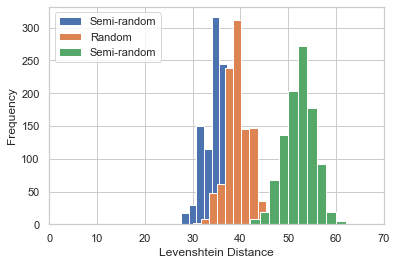

In [114]:
import random

weak   = ['A','T']
strong = ['G','C']

LV = []
LV_r = []

barcode_o = []

cnt = 0
while cnt < 23:
    w = random.choice(weak)

    s = random.choice(strong)

    n = random.choice(random.choice([strong,weak]))

    barcode_o.append(w)
    barcode_o.append(s)
    barcode_o.append(n)
    cnt += 1
    
barcode_o = ''.join(barcode_o)

for i in range(1000):
    
    barcode_i = []
    
    cnt = 0
    while cnt < 23:
        w = random.choice(weak)

        s = random.choice(strong)
        
        n = random.choice(random.choice([strong,weak]))
    
        barcode_i.append(w)
        barcode_i.append(s)
        barcode_i.append(n)
        cnt += 1
        
    barcode_i = ''.join(barcode_i)
    LV.append(levenshteinDistance(barcode_o, barcode_i))

    
barcode_o = []
cnt = 0
while cnt < 69:
    w = random.choice(weak)

    s = random.choice(strong)

    n = random.choice(random.choice([strong,weak]))

    #barcode_o.append(w)
    #barcode_o.append(s)
    barcode_o.append(n)
    cnt += 1
    
barcode_o = ''.join(barcode_o)
    
for i in range(1000):
    
    barcode_i = []
    
    cnt = 0
    while cnt < 69:
        w = random.choice(weak)

        s = random.choice(strong)
        
        n = random.choice(random.choice([strong,weak]))
    
        #barcode_i.append(w)
        #barcode_i.append(s)
        barcode_i.append(n)
        cnt += 1
        
    barcode_i = ''.join(barcode_i)
    LV_r.append(levenshteinDistance(barcode_o, barcode_i))

LV_s = [] 
barcode_o = []
cnt = 0
while cnt < 69:

    n = random.choice(['A'])

    #barcode_o.append(w)
    #barcode_o.append(s)
    barcode_o.append(n)
    cnt += 1
    
barcode_o = ''.join(barcode_o)
    
for i in range(1000):
    
    barcode_i = []
    
    cnt = 0
    while cnt < 23:
        w = random.choice(weak)

        s = random.choice(strong)
        
        n = random.choice(random.choice([strong,weak]))
    
        barcode_i.append(w)
        barcode_i.append(s)
        barcode_i.append(n)
        cnt += 1
        
    barcode_i = ''.join(barcode_i)
    LV_s.append(levenshteinDistance(barcode_o, barcode_i))

plt.hist(LV, label="Semi-random")
plt.hist(LV_r, label="Random")
plt.hist(LV_s, label="Semi-random")
plt.legend(loc="upper left")
plt.xlim(0,70)
plt.xlabel('Levenshtein Distance')
plt.ylabel('Frequency')

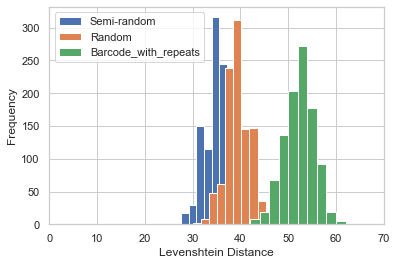

In [115]:
plt.hist(LV, label="Semi-random")
plt.hist(LV_r, label="Random")
plt.hist(LV_s, label="Barcode_with_repeats")
plt.legend(loc="upper left")
plt.xlim(0,70)
plt.xlabel('Levenshtein Distance')
plt.ylabel('Frequency')
plt.savefig("/Volumes/GoogleDrive/My Drive/Hueros_Shared/Paper/Data/10x/LV.pdf", bbox_inches='tight')
plt.show()

In [31]:

import random
 
# initializing list
test_list = [1, 4, 5, 2, 7]
 
random_num = random.choice(test_list)




Original list is : [1, 4, 5, 2, 7]
Random selected number is : 4


In [116]:
barcode_i

'AGTAGGTCTAGCACGTGATCTTGCAGCACGAGCACAACAACCACATGATCATGAAGGAGGTGCTGAAGC'

In [117]:
barcode_o = []
cnt = 0
while cnt < 69:
    w = random.choice(weak)

    s = random.choice(strong)

    n = random.choice(random.choice([strong,weak]))

    #barcode_o.append(w)
    #barcode_o.append(s)
    barcode_o.append(n)
    cnt += 1
    
barcode_o = ''.join(barcode_o)

In [118]:
barcode_o

'TATAGAGGGGCCGCCCTCCCCCAGGAAGTTGTAATTCGTGTTTGAACCGGCCTCTAAAACCGGGCGTCT'